# Data Analysis case study example from Jovian

[Course Video](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study)


In [6]:
import opendatasets as od

In [7]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [8]:
import os
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

In [9]:
import pandas as pd
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [10]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [11]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [12]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [13]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [14]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [15]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]
len(selected_columns)

20

In [16]:
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns].copy()

In [17]:
survey_df.shape

(64461, 20)

In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [19]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


__Those ages sure look funny__

In [20]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)

In [21]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [22]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [23]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [24]:
import numpy as np

In [25]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [26]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
24419,United Kingdom,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,10.0,5.0,Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,Go;Java;JavaScript;Julia;Kotlin;Python;R;Scala...,Once a year,Visit Stack Overflow,Employed full-time,Data scientist or machine learning specialist,35.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
49717,Kenya,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,6.0,2.0,HTML/CSS;PHP;SQL,Go;Kotlin,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst,40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
18377,Ireland,39.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,7.0,33.0,17.0,Assembly;Bash/Shell/PowerShell;C++;HTML/CSS;Ja...,Bash/Shell/PowerShell;C++;Go;HTML/CSS;Java;Jav...,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Database administrator;Developer, full-stack;D...",45.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Specific depa...,Sometimes: 1-2 days per month but less than we...,Fairly important
1501,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,10.0,10.0,6.0,Bash/Shell/PowerShell;JavaScript;Python;R;SQL,Bash/Shell/PowerShell;Python;R;SQL,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Data scientist or machine learning specialist;...,40.0,Very satisfied,Industry that I’d be working in;Office environ...,Sometimes: 1-2 days per month but less than we...,Critically important
42561,United Kingdom,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,12.0,5.0,HTML/CSS;JavaScript;PHP;TypeScript,HTML/CSS;JavaScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
42551,Bangladesh,NaN,NaN,Primary/elementary school,NaN,Yes,12.0,2.0,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
36603,Belarus,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,PHP,JavaScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
15111,United States,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,22.0,4.0,1.0,C#;SQL;TypeScript,C#;Go;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,45.0,Slightly satisfied,Diversity of the company or organization;Langu...,Often: 1-2 days per week or more,Not at all important/not necessary
45611,United States,48.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,29.0,23.0,JavaScript;PHP;Python;SQL,Dart;JavaScript;PHP,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, full-stack",40.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Rarely: 1-2 days per year or less,Fairly important
15826,Brazil,28.0,"Non-binary, genderqueer, or gender non-conforming",Some college/university study without earning ...,"Information systems, information technology, o...",Yes,20.0,7.0,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScrip

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [28]:
schema.Country

'Where do you live?'

In [29]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [30]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

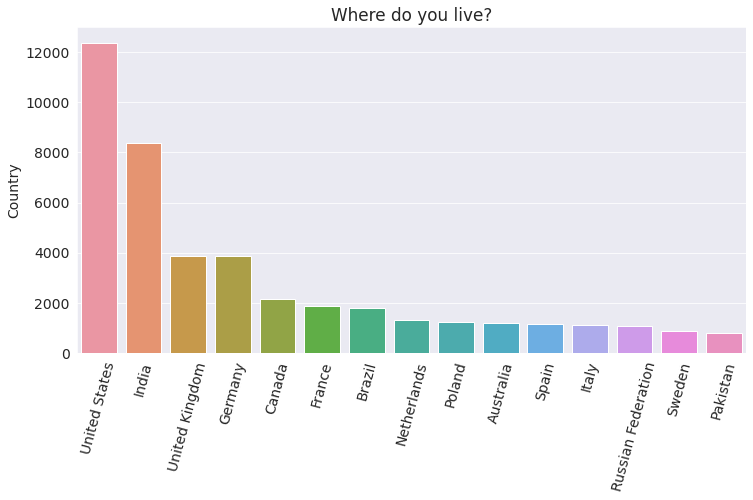

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y=top_countries)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

**Exercise**:
Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

### Age

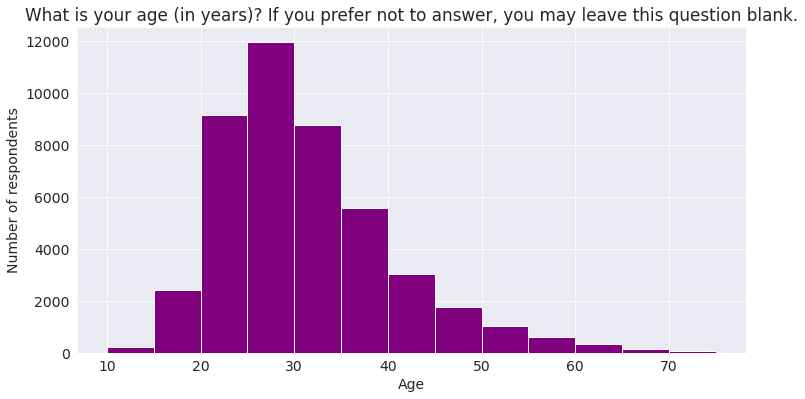

In [32]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

**Exercise**: You may want to filter out responses by age (or age group) if you'd like to analyze and compare the survey results for different age groups. Create a new column called AgeGroup containing values like `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years` and `Older than 60 years`. Then, repeat the analysis in the rest of this notebook for each age group.

In [51]:
survey_df['AgeGroup'] = np.where(survey_df['Age'] < 18, "Younger than 18",
                        np.where((survey_df['Age'] >=18) & (survey_df['Age'] < 26), "19-25",
                        np.where((survey_df['Age'] >=18) & (survey_df['Age'] < 26), "19-25",
                        np.where((survey_df['Age'] >=18) & (survey_df['Age'] < 26), "19-25",
                                 "Other"))
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Other
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Other
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,Another
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,Other
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Other
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [54]:
survey_df['AgeGroup'] = np.where(survey_df['Age'] < 18, "Younger than 18",
                        np.where((survey_df['Age'] >= 18) & 
                                 (survey_df['Age'] <= 25), "18-25 years",
                        np.where((survey_df['Age'] > 25) & 
                                 (survey_df['Age'] <= 35), "26-35 years",
                        np.where((survey_df['Age'] > 35) & 
                                 (survey_df['Age'] <= 45), "36-45 years",
                        np.where((survey_df['Age'] > 45) & 
                                 (survey_df['Age'] <= 55), "46-55 years",
                        "Older than 55")))))
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Older than 55
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Older than 55
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older than 55
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18-25 years
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,26-35 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,Older than 55
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Older than 55
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older than 55
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Older than 55


### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [33]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [34]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution. __not__

([<matplotlib.patches.Wedge at 0x7f2b82e50580>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

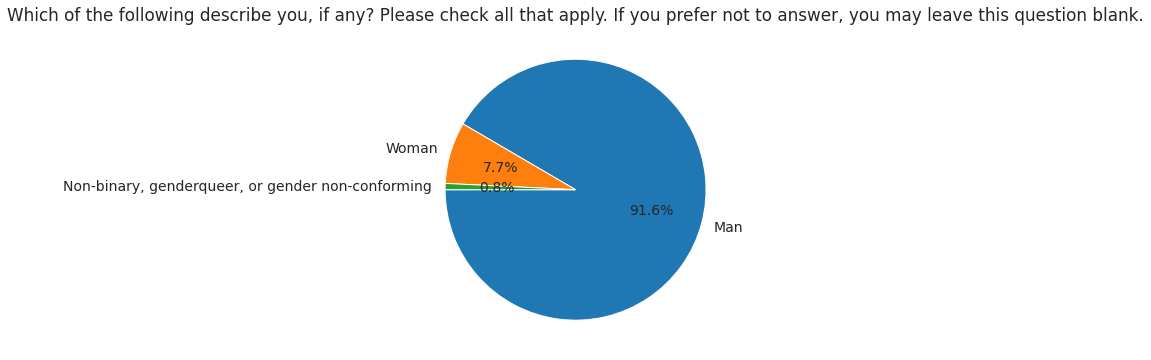

In [35]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, 
        labels = gender_counts.index, 
        autopct='%1.1f%%',
        startangle=180)

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

Exercise: It would be interesting to compare the survey responses & preferences across genders. Repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How do the salaries vary? You may find this analysis on the Gender Divide in Data Science useful.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

Text(0, 0.5, '')

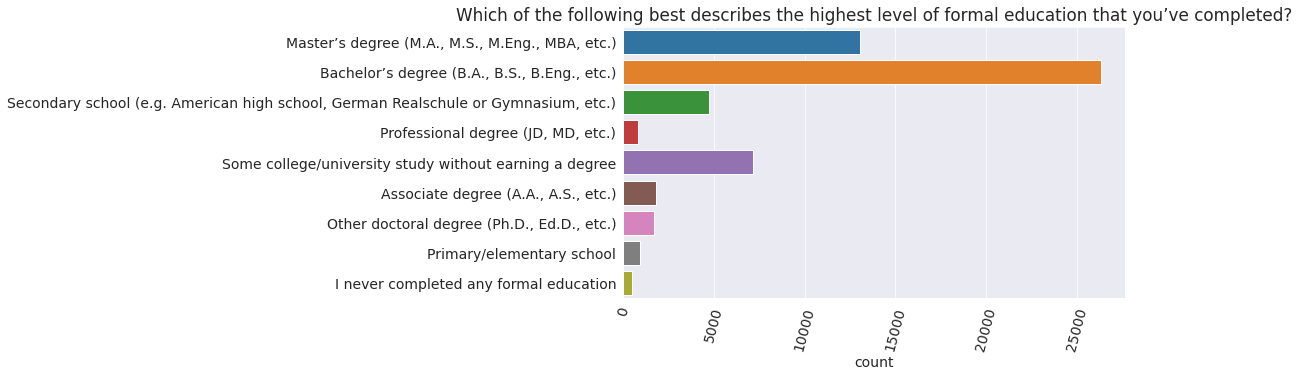

In [36]:
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None)

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

**Exercises**: The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women. 